### OPCKD Exploring Data

### Setup

In [869]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [870]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [871]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Image saved as {file_path}')

#### Recovering the data

In [872]:
import pandas as pd

In [873]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "datasets"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [874]:
def load_opcdk_data(ldd_path = LDD_PATH):
  csv_path = os.path.join(ldd_path, 'OsteoporosisPredictionInCKD.csv')
  return pd.read_csv(csv_path)

#### Understanding the data structure

In [875]:
opcdk = load_opcdk_data()

In [876]:
opcdk.head()

,Cre,Gender,eGFR,Osteoporosis,Age,Weight,Height,BMI,Albumin,Calcium,...,CVA,Cataract,Fragility fracture hx,T1DM,Osteogenesis Imperfecta,Hyperthyroidism,Hypogonadism,Premature ovarian insufficiency,Malnutrition,Chronic liver disease
0,1.12,0,58.75,1,53.2,42.7,155.1,17.8,4.2,9.4,...,0,1,0,0,0,0,0,0,0,0
1,1.81,1,38.87,1,73.5,NaN,NaN,NaN,3.5,8.8,...,0,0,0,0,0,0,0,0,0,0
2,1.05,0,52.28,1,84.4,NaN,NaN,NaN,2.9,7.6,...,0,0,1,0,0,0,0,0,0,0
3,0.98,0,56.88,1,84.1,NaN,NaN,NaN,3.7,9.5,...,0,0,1,0,0,0,0,0,0,0
4,1.15,0,47.11,1,83.5,62.7,152.3,27.0,NaN,8.8,...,1,0,1,0,0,0,0,0,0,0


In [877]:
opcdk.columns

Index(['Cre', 'Gender', 'eGFR', 'Osteoporosis', 'Age', 'Weight', 'Height',
       'BMI', 'Albumin', 'Calcium', 'Phosphate', 'ALP', 'iPTH', 'HbA1c',
       'Glucose', 'WBC', 'HGB', 'Steroid usage', 'OA', 'RA', 'DM', 'HTN',
       'CVA', 'Cataract', 'Fragility fracture hx', 'T1DM',
       'Osteogenesis Imperfecta', 'Hyperthyroidism', 'Hypogonadism',
       'Premature ovarian insufficiency', 'Malnutrition',
       'Chronic liver disease'],
      dtype='object')

In [878]:
# Removing unnecessary columns
opcdk = opcdk.drop(columns=['Weight', 'Height', 'Premature ovarian insufficiency'])

In [879]:
opcdk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cre                      6614 non-null   float64
 1   Gender                   6614 non-null   int64  
 2   eGFR                     6614 non-null   float64
 3   Osteoporosis             6614 non-null   int64  
 4   Age                      6614 non-null   float64
 5   BMI                      4311 non-null   float64
 6   Albumin                  5945 non-null   float64
 7   Calcium                  6142 non-null   float64
 8   Phosphate                4522 non-null   float64
 9   ALP                      5542 non-null   float64
 10  iPTH                     2810 non-null   float64
 11  HbA1c                    5291 non-null   float64
 12  Glucose                  6028 non-null   float64
 13  WBC                      5069 non-null   float64
 14  HGB                     

In [880]:
opcdk = opcdk.drop(columns=['iPTH'])

In [881]:
binary_cols = [
    col for col in opcdk.columns
    if opcdk[col].dropna().isin([0, 1]).all()
]

In [882]:
opcdk[binary_cols] = opcdk[binary_cols].fillna(0)

In [883]:
opcdk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cre                      6614 non-null   float64
 1   Gender                   6614 non-null   int64  
 2   eGFR                     6614 non-null   float64
 3   Osteoporosis             6614 non-null   int64  
 4   Age                      6614 non-null   float64
 5   BMI                      4311 non-null   float64
 6   Albumin                  5945 non-null   float64
 7   Calcium                  6142 non-null   float64
 8   Phosphate                4522 non-null   float64
 9   ALP                      5542 non-null   float64
 10  HbA1c                    5291 non-null   float64
 11  Glucose                  6028 non-null   float64
 12  WBC                      5069 non-null   float64
 13  HGB                      5088 non-null   float64
 14  Steroid usage           

In [884]:
# Visualizing the distribution of the target variable
opcdk['Osteoporosis'].value_counts()

Osteoporosis
1    4526
0    2088
Name: count, dtype: int64

In [885]:
opcdk.describe()

,Cre,Gender,eGFR,Osteoporosis,Age,BMI,Albumin,Calcium,Phosphate,ALP,...,HTN,CVA,Cataract,Fragility fracture hx,T1DM,Osteogenesis Imperfecta,Hyperthyroidism,Hypogonadism,Malnutrition,Chronic liver disease
count,6614.000000,6614.000000,6614.000000,6614.000000,6614.000000,4311.000000,5945.000000,6142.000000,4522.000000,5542.000000,...,6614.000000,6614.000000,6614.000000,6614.000000,6614.000000,6614.0,6614.000000,6614.000000,6614.000000,6614.000000
mean,2.316964,0.299667,41.268966,0.684306,73.260553,24.355486,3.822439,8.947639,3.742680,118.589498,...,0.729664,0.266556,0.375416,0.510886,0.012398,0.0,0.082855,0.011037,0.013607,0.321439
std,2.738952,0.458147,17.095048,0.464827,12.729108,4.331088,0.571244,0.847437,1.169397,99.751329,...,0.444167,0.442192,0.484267,0.499919,0.110662,0.0,0.275683,0.104485,0.115864,0.467064
min,0.890000,0.000000,2.090000,0.000000,21.800000,12.500000,1.100000,4.300000,0.200000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.120000,0.000000,32.212500,0.000000,66.300000,21.400000,3.500000,8.500000,3.100000,73.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.330000,0.000000,47.335000,1.000000,75.300000,24.100000,3.900000,9.000000,3.600000,95.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.800000,1.000000,54.977500,1.000000,82.500000,26.900000,4.200000,9.400000,4.200000,129.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,20.480000,1.000000,59.990000,1.000000,105.100000,57.600000,5.100000,15.500000,15.000000,2287.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [886]:
# histogram for numeric attributes
%matplotlib inline
import matplotlib.pyplot as plt

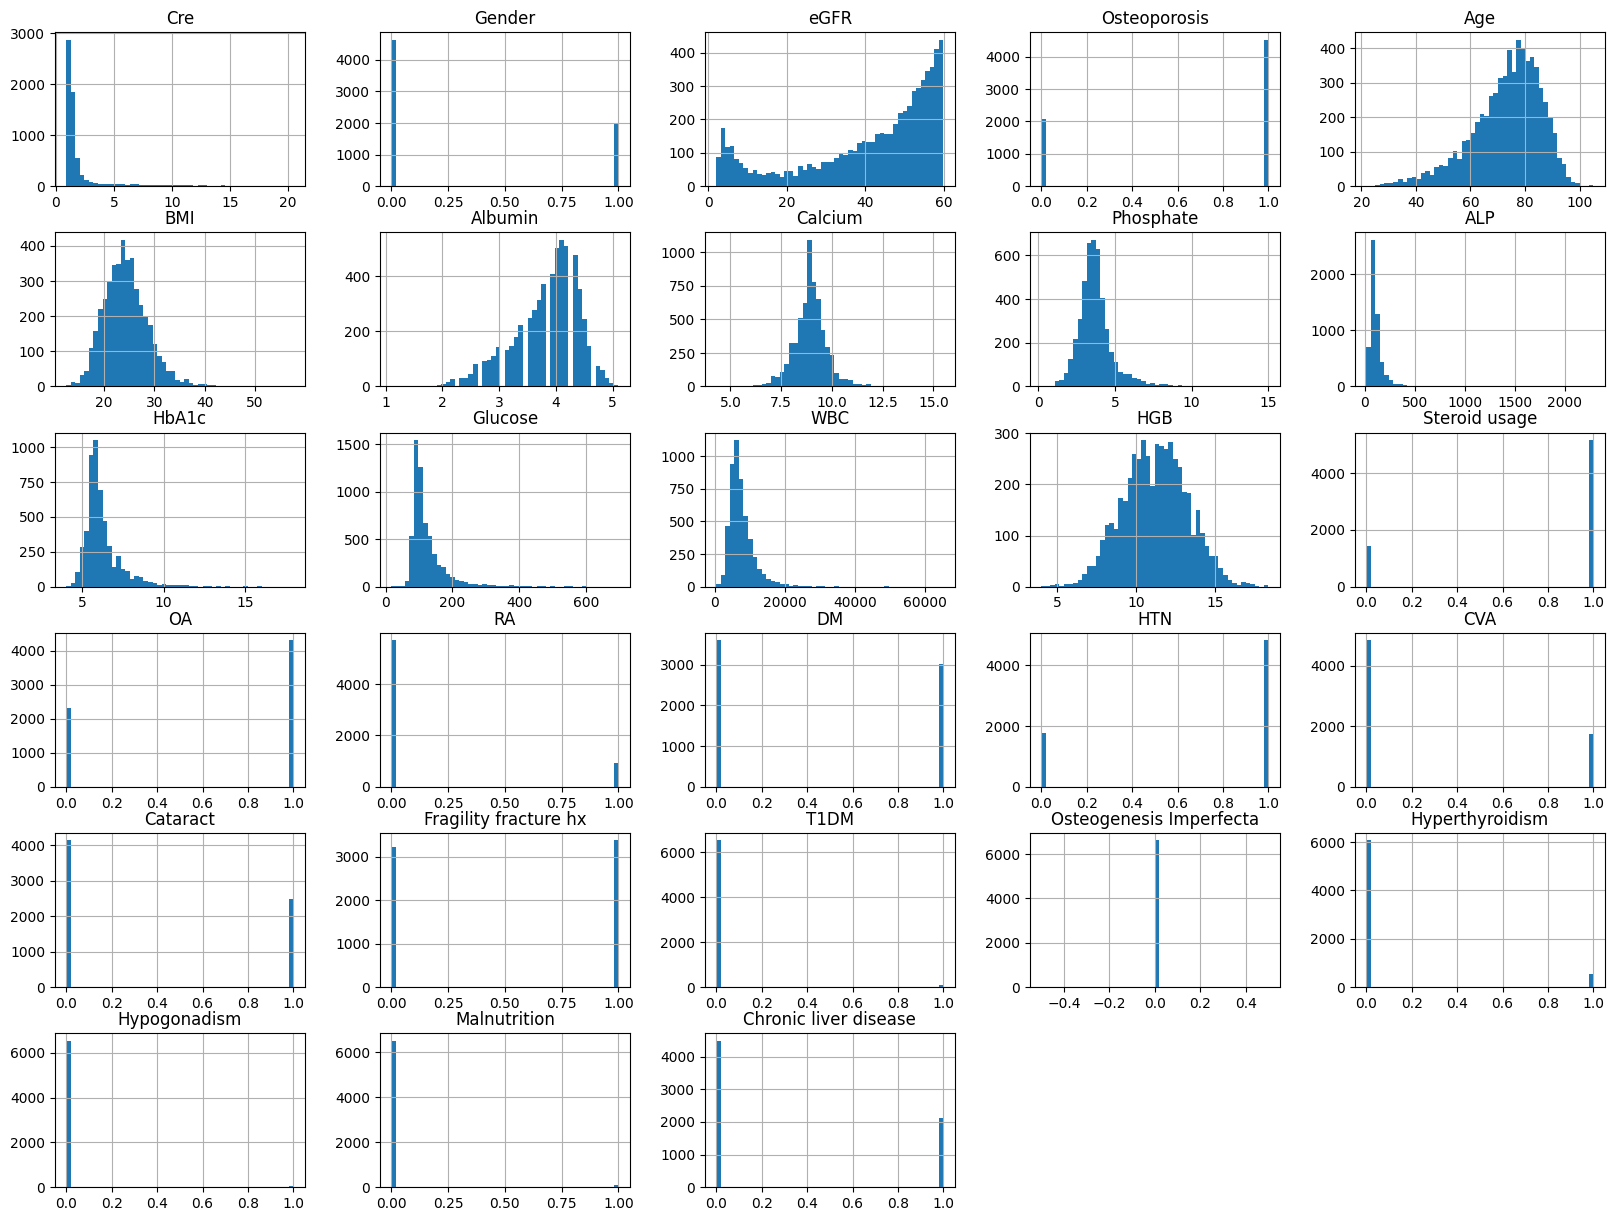

In [887]:
opcdk.hist(bins=50, figsize=(20, 15))
plt.show()

#### Exploring and visualizing data

In [888]:
import seaborn as sns

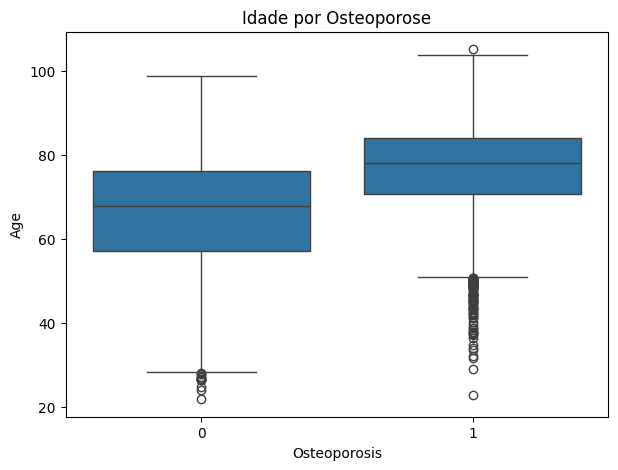

In [889]:
plt.figure(figsize=(7,5))
sns.boxplot(data=opcdk, x="Osteoporosis", y="Age")
plt.title("Idade por Osteoporose")
plt.show()

O gráfico mostra que pessoas com osteoporose tendem a ser mais velhas do que as sem osteoporose. Isso vai na mesma direção do que se observa em estudos: a idade é um dos principais fatores de risco para osteoporose.

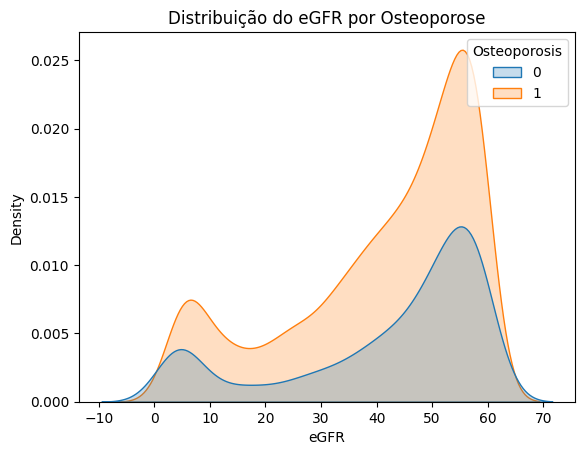

In [890]:
sns.kdeplot(data=opcdk, x="eGFR", hue="Osteoporosis", fill=True)
plt.title("Distribuição do eGFR por Osteoporose")
plt.show()

Em geral, os valores de eGFR são parecidos entre quem tem e quem não tem osteoporose, com uma leve tendência a valores um pouco menores no grupo com osteoporose em parte da distribuição. Isso se conecta ao fato de que função renal (eGFR) e saúde óssea podem se relacionar, mas nem sempre a piora renal é um fator independente de risco para osteoporose depois de ajustar por idade e outros fatores.

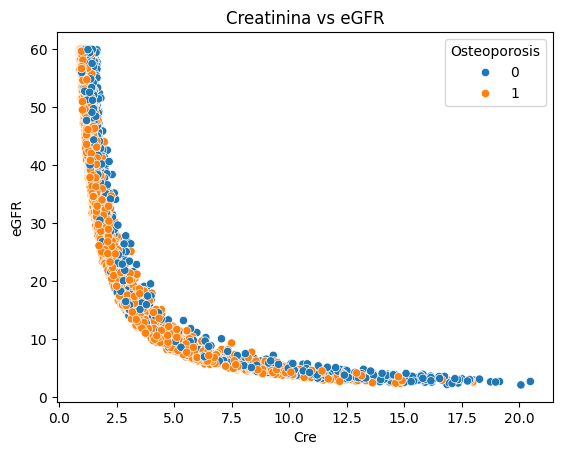

In [891]:
sns.scatterplot(data=opcdk, x="Cre", y="eGFR", hue="Osteoporosis")
plt.title("Creatinina vs eGFR")
plt.show()

Conforme a creatinina aumenta, o eGFR cai de forma acentuada, e isso acontece de modo muito semelhante nos grupos com e sem osteoporose. A nuvem de pontos laranja (osteoporose = 1) e azul (osteoporose = 0) praticamente se sobrepõe, sugerindo que a relação creatinina–eGFR não é diferente entre os grupos.

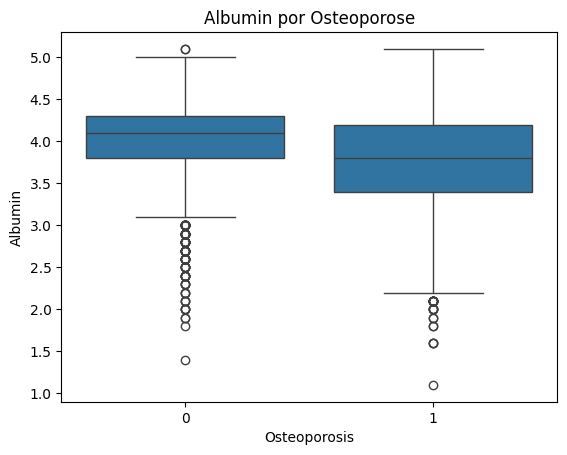

In [892]:
sns.boxplot(data=opcdk, x="Osteoporosis", y="Albumin")
plt.title("Albumin por Osteoporose")
plt.show()

Os níveis de albumina são bem parecidos entre os grupos com e sem osteoporose, com mediana em torno de 3,8–4,0 g/dL nos dois casos. A principal diferença visual está na cauda inferior, há mais valores muito baixos (hipoalbuminemia) no grupo sem osteoporose, mas também existem alguns no grupo com osteoporose.

O uso de esteroides é a condição mais comum, seguido de hipertensão, osteoartrite e histórico de fratura por fragilidade. Isso é relevante porque várias delas são fatores de risco clássicos ou associados para osteoporose e fraturas.

#### Handling missing values

In [893]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [894]:
binary_features = [
    c for c in opcdk.columns
    if opcdk[c].dropna().isin([0, 1]).all() and c != "Osteoporosis"
]

numeric_features = [
    c for c in opcdk.select_dtypes(include=["int64", "float64"]).columns
    if c not in binary_features and c != "Osteoporosis"
]

categorical_features = [
    c for c in opcdk.columns
    if c not in numeric_features + binary_features
]


In [895]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

In [896]:
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("bin", "passthrough", binary_features),
    ("cat", categorical_transformer, categorical_features),
])

In [897]:
opcdk_clean = preprocessor.fit_transform(opcdk)

In [898]:
opcdk_preprocessed = pd.DataFrame(
    opcdk_clean,
    columns=list(numeric_features) + list(binary_features) + list(categorical_features),
)

In [899]:
opcdk_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cre                      6614 non-null   float64
 1   eGFR                     6614 non-null   float64
 2   Age                      6614 non-null   float64
 3   BMI                      6614 non-null   float64
 4   Albumin                  6614 non-null   float64
 5   Calcium                  6614 non-null   float64
 6   Phosphate                6614 non-null   float64
 7   ALP                      6614 non-null   float64
 8   HbA1c                    6614 non-null   float64
 9   Glucose                  6614 non-null   float64
 10  WBC                      6614 non-null   float64
 11  HGB                      6614 non-null   float64
 12  Gender                   6614 non-null   float64
 13  Steroid usage            6614 non-null   float64
 14  OA                      

In [900]:
opcdk_preprocessed['Osteoporosis'].value_counts()

Osteoporosis
1.0    4526
0.0    2088
Name: count, dtype: int64

#### Identifying outliers

In [901]:
from sklearn.preprocessing import PowerTransformer

In [902]:
def treat_outliers_iqr(df, cols):
    df_clean = df.copy()
    outliers_dict = {}

    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        mask_out = (df_clean[col] < lim_inf) | (df_clean[col] > lim_sup)
        outliers_dict[col] = df_clean[mask_out]

        df_clean[col] = df_clean[col].clip(lower=lim_inf, upper=lim_sup)

    all_outliers = pd.concat(outliers_dict.values()).drop_duplicates()

    return df_clean, outliers_dict, all_outliers

In [903]:
opcdk_treated, outliers_por_coluna, outliers_total = treat_outliers_iqr(
    opcdk_preprocessed,
    numeric_features
)

print("Tamanho original:", opcdk_preprocessed.shape)
print("Tamanho após tratamento:", opcdk_treated.shape)
print("Total de outliers detectados:", outliers_total.shape)

Tamanho original: (6614, 28)
Tamanho após tratamento: (6614, 28)
Total de outliers detectados: (6455, 28)


In [904]:
opcdk_treated['Osteoporosis'].value_counts()

Osteoporosis
1.0    4526
0.0    2088
Name: count, dtype: int64

In [905]:
for col, df_out in outliers_por_coluna.items():
    print(f"\n--- Outiliers em {col} ({df_out.shape[0]} registros) ---")
    display(df_out[[col]])


--- Outiliers em Cre (999 registros) ---


,Cre
9,3.57
10,3.88
18,7.28
29,3.00
34,6.76
...,...
6596,10.08
6597,12.93
6599,10.16
6601,3.85



--- Outiliers em eGFR (0 registros) ---


,eGFR



--- Outiliers em Age (152 registros) ---


,Age
29,36.2
59,41.1
62,39.7
104,38.1
112,38.4
...,...
6468,35.5
6486,40.5
6554,28.2
6563,30.7



--- Outiliers em BMI (1174 registros) ---


,BMI
0,17.8
6,18.3
8,30.6
14,32.3
22,19.4
...,...
6579,19.1
6585,33.6
6589,29.6
6593,33.6



--- Outiliers em Albumin (250 registros) ---


,Albumin
10,2.5
47,2.6
75,2.2
84,2.1
95,2.5
...,...
6561,2.2
6575,2.4
6595,2.5
6600,2.6



--- Outiliers em Calcium (367 registros) ---


,Calcium
55,11.2
75,5.4
79,6.4
97,7.1
103,7.0
...,...
6556,11.0
6571,10.6
6575,7.1
6583,7.2



--- Outiliers em Phosphate (828 registros) ---


,Phosphate
2,1.7
8,2.2
9,1.4
10,5.7
18,6.2
...,...
6556,5.2
6579,5.1
6596,6.9
6597,7.3



--- Outiliers em ALP (577 registros) ---


,ALP
1,216.0
10,207.0
21,237.0
47,443.0
55,243.0
...,...
6561,198.0
6583,721.0
6586,520.0
6596,244.0



--- Outiliers em HbA1c (698 registros) ---


,HbA1c
7,8.7
14,7.5
20,8.2
31,7.9
33,9.2
...,...
6553,10.5
6560,10.1
6562,8.6
6604,10.5



--- Outiliers em Glucose (547 registros) ---


,Glucose
7,306.0
33,230.0
55,211.0
77,231.0
88,211.0
...,...
6580,284.0
6582,210.0
6583,260.0
6604,348.0



--- Outiliers em WBC (568 registros) ---


,WBC
14,14250.0
19,11880.0
67,11710.0
79,14380.0
98,54900.0
...,...
6521,17190.0
6523,16570.0
6539,17840.0
6553,14510.0



--- Outiliers em HGB (295 registros) ---


,HGB
30,15.9
44,15.4
112,6.1
123,15.2
134,6.7
...,...
6502,6.2
6518,6.4
6533,15.1
6554,5.6


In [906]:
numeric_features_pt = list(numeric_features)
print("PowerTransformer vai rodar em:", numeric_features_pt)

PowerTransformer vai rodar em: ['Cre', 'eGFR', 'Age', 'BMI', 'Albumin', 'Calcium', 'Phosphate', 'ALP', 'HbA1c', 'Glucose', 'WBC', 'HGB']


In [907]:
pt = PowerTransformer(method='yeo-johnson')

opcdk_transformed = opcdk_treated.copy()
opcdk_transformed[numeric_features] = pt.fit_transform(opcdk_treated[numeric_features])

In [908]:
opcdk_transformed['Osteoporosis'].value_counts()

Osteoporosis
1.0    4526
0.0    2088
Name: count, dtype: int64

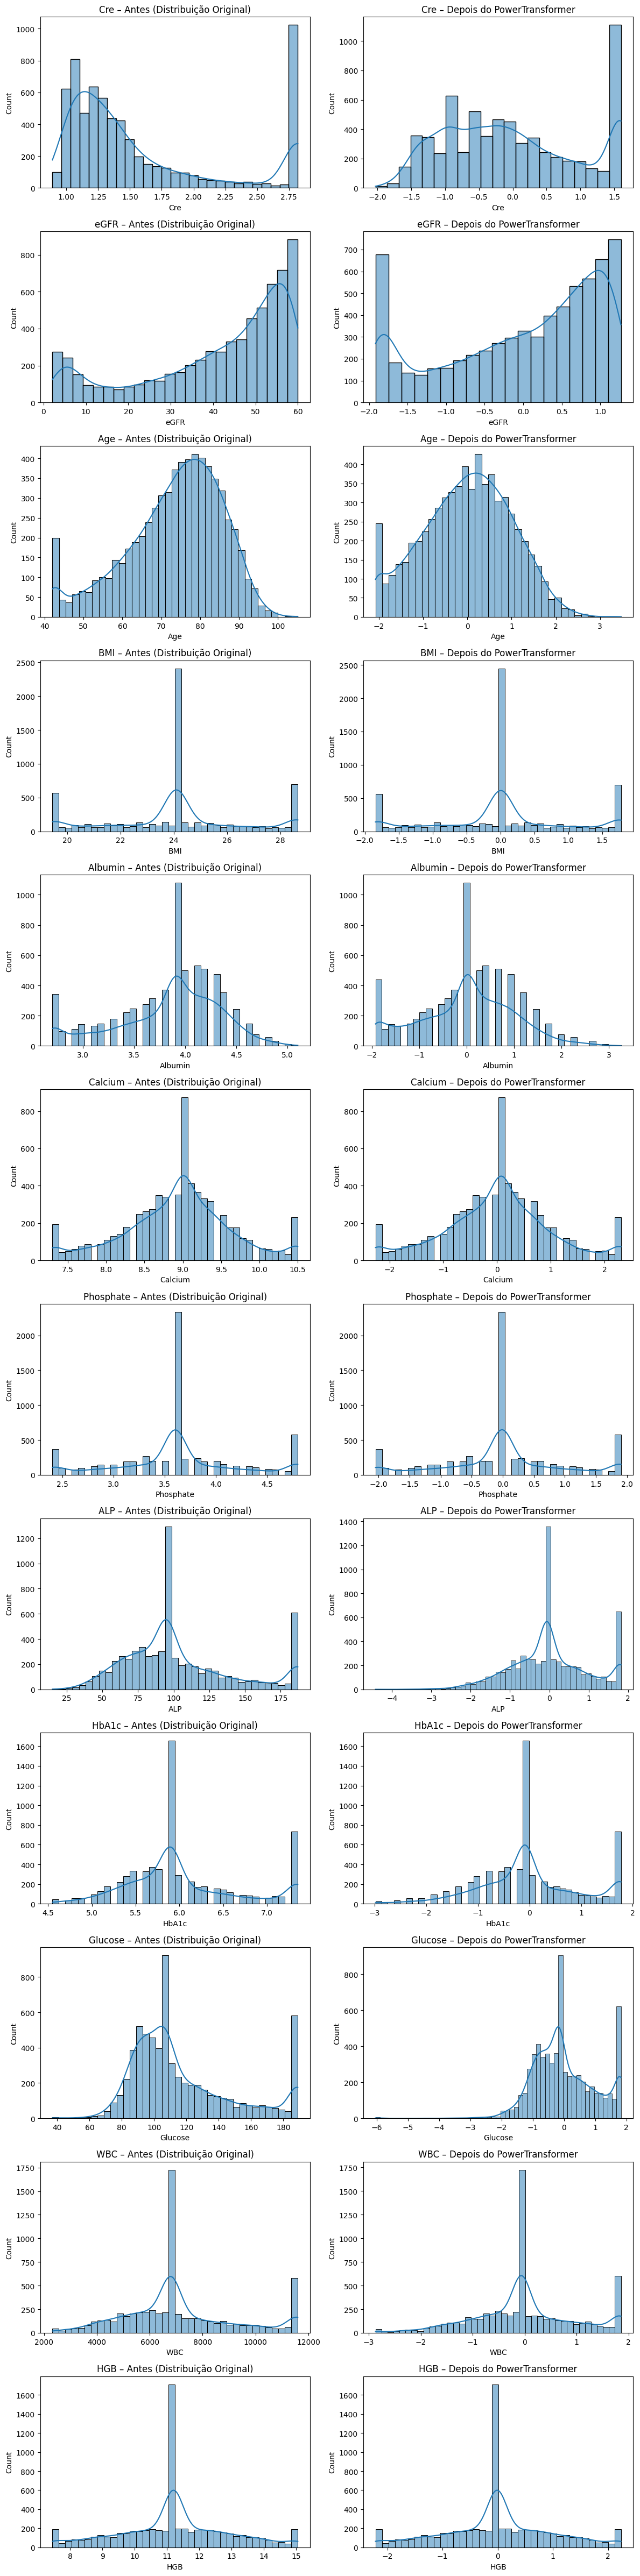

In [909]:
fig, axes = plt.subplots(len(numeric_features), 2, figsize=(12, 4*len(numeric_features)))

for i, col in enumerate(numeric_features):
    # Antes
    sns.histplot(opcdk_treated[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f"{col} – Antes (Distribuição Original)")
    
    # Depois (PowerTransformer)
    sns.histplot(opcdk_transformed[col], kde=True, ax=axes[i,1])
    axes[i,1].set_title(f"{col} – Depois do PowerTransformer")

plt.tight_layout()
plt.show()

#### Data normalization

In [910]:
from sklearn.preprocessing import StandardScaler

In [911]:
scaler = StandardScaler()

In [912]:
opcdk_transformed.columns

Index(['Cre', 'eGFR', 'Age', 'BMI', 'Albumin', 'Calcium', 'Phosphate', 'ALP',
       'HbA1c', 'Glucose', 'WBC', 'HGB', 'Gender', 'Steroid usage', 'OA', 'RA',
       'DM', 'HTN', 'CVA', 'Cataract', 'Fragility fracture hx', 'T1DM',
       'Osteogenesis Imperfecta', 'Hyperthyroidism', 'Hypogonadism',
       'Malnutrition', 'Chronic liver disease', 'Osteoporosis'],
      dtype='object')

In [913]:
y = opcdk_transformed["Osteoporosis"]
X_df = opcdk_transformed.drop(columns=["Osteoporosis"])

numeric_features = X_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
binary_features = [col for col in numeric_features if X_df[col].nunique() == 2]
numeric_features = [col for col in numeric_features if col not in binary_features]

categorical_features = X_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [914]:
X_num = opcdk_transformed[numeric_features]
X_bin = opcdk_transformed[binary_features]
X_cat = opcdk_transformed[categorical_features]

X_num_scaled = scaler.fit_transform(X_num)

X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

X = pd.concat(
    [X_num_scaled, X_bin, X_cat],
    axis=1
)

y = opcdk_transformed["Osteoporosis"]

#### Creating a test suite

In [915]:
from sklearn.model_selection import train_test_split

In [916]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#### Balancing the data

In [917]:
from imblearn.over_sampling import SMOTE

In [918]:
opcdk_transformed['Osteoporosis'].value_counts()

Osteoporosis
1.0    4526
0.0    2088
Name: count, dtype: int64

In [919]:
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

In [920]:
print("\nDistribuição original:", y_train.value_counts())
print("Distribuição balanceada:", y_train_bal.value_counts())


Distribuição original: Osteoporosis
1.0    3621
0.0    1670
Name: count, dtype: int64
Distribuição balanceada: Osteoporosis
0.0    3621
1.0    3621
Name: count, dtype: int64


#### Saving the datasets

In [921]:
opcdk_preprocessed.to_csv("opcdk_preprocessed.csv", index=False)
print("✔ Arquivo salvo: opcdk_preprocessed.csv")

opcdk_treated.to_csv("opcdk_no_outliers.csv", index=False)
print("✔ Arquivo salvo: opcdk_no_outliers.csv")

feature_names = X.columns
X_train_df = pd.DataFrame(X_train_bal, columns=feature_names)
X_test_df  = pd.DataFrame(X_test, columns=feature_names)

X_train_df.to_csv("X_train.csv", index=False)
X_test_df.to_csv("X_test.csv", index=False)
y_train_bal.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("✔ Arquivos de treino e teste salvos!")

✔ Arquivo salvo: opcdk_preprocessed.csv
✔ Arquivo salvo: opcdk_no_outliers.csv
✔ Arquivos de treino e teste salvos!
